#### Тема “Классификация текста”

#### Подготовка

In [1]:
import pandas as pd
import numpy as np

from sklearn import linear_model, metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [2]:
combine_df = pd.read_pickle('tweet_data.pkl')
combine_df.head(2)

,id,label,tweet,clean_tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized
0,1,0.0,@user when a father is dysfunctional and is s...,when father is dysfunctional and is so selfish...,"[when, father, is, dysfunctional, and, is, so,...","[father, dysfunctional, selfish, drags, kids, ...","[father, dysfunct, selfish, drag, kid, dysfunc...","[father, dysfunctional, selfish, drag, kid, dy..."
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit cannot use cause they d...,"[thanks, for, lyft, credit, can, not, use, cau...","[thanks, lyft, credit, use, cause, offer, whee...","[thank, lyft, credit, use, caus, offer, wheelc...","[thanks, lyft, credit, use, cause, offer, whee..."


In [3]:
combine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49159 entries, 0 to 49158
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    49159 non-null  int64  
 1   label                 31962 non-null  float64
 2   tweet                 49159 non-null  object 
 3   clean_tweet           49159 non-null  object 
 4   tweet_token           49159 non-null  object 
 5   tweet_token_filtered  49159 non-null  object 
 6   tweet_stemmed         49159 non-null  object 
 7   tweet_lemmatized      49159 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 3.0+ MB


##### Задание 1-3.

Необходимо получить разреженные матрицы, используя CountVectorizer, TfidfVectorizer для 'tweet_stemmed' и 'tweet_lemmatized' столбцов (4 матрицы). 

Построим модель LogisticRegression, используя Bag-of-Words признаки для столбца combine_df['tweet_stemmed'].   
- Поделим Bag-of-Words признаки на train, test (train заканчивается на 31962 строке combine_df)  
- Ответами является столбец train_df['label']  
- Рассчитаем predict_proba, приведем prediction в в бинарный вид: если предсказание >= 0.3 то 1, иначе 0, тип заменим на int  
- Рассчитаем f1_score  

Повторим аналогично для столбца combine_df['tweet_lemmatized'].  


In [4]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, valid_y, is_neural_net=False):
    classifier.fit(feature_vector_train, label)
    
    predictions = classifier.predict(feature_vector_valid)
    predictions = predictions >= 0.3
    
    return metrics.f1_score(predictions, valid_y)

In [5]:
train_df = combine_df[~combine_df['label'].isna()]
test_df = combine_df[combine_df['label'].isna()]

In [6]:
SIZE = 21962

In [7]:
train_stemmed_x = train_df['tweet_stemmed'].apply(lambda x: ' '.join(x))
train_lemmatized_x = train_df['tweet_lemmatized'].apply(lambda x: ' '.join(x))
train_y = train_df['label'].astype(int)

train_stemmed_x, train_lemmatized_x, train_y, valid_stemmed_x, valid_lemmatized_x, valid_y = \
    train_stemmed_x[:SIZE], train_lemmatized_x[:SIZE], train_y[:SIZE], \
    train_stemmed_x[SIZE:],  train_lemmatized_x[SIZE:], train_y[SIZE:]

#### Use CountVectorizer for stemmed tweet

In [8]:
cv_stemmed = CountVectorizer(max_df=0.9, stop_words='english', max_features=1000)
train_stemmed_count_x = cv_stemmed.fit_transform(train_stemmed_x)
valid_stemmed_count_x = cv_stemmed.transform(valid_stemmed_x)

In [9]:
f1_stemmed_count = train_model(linear_model.LogisticRegression(), train_stemmed_count_x, train_y, valid_stemmed_count_x, valid_y)
print(f'f1-score stemmed tweets with CountVectorizer {f1_stemmed_count}')

f1-score stemmed tweets with CountVectorizer 0.4869059165858389


#### Use TfidfVectorizer for stemmed tweet

In [10]:
tfidf_stemmed = TfidfVectorizer(max_df=0.9, stop_words='english', max_features=1000)
train_stemmed_tfidf_x = tfidf_stemmed.fit_transform(train_stemmed_x)
valid_stemmed_tfidf_x = tfidf_stemmed.transform(valid_stemmed_x)

In [11]:
f1_stemmed_tfidf = train_model(linear_model.LogisticRegression(), train_stemmed_tfidf_x, train_y, valid_stemmed_tfidf_x , valid_y)
print(f'f1-score stemmed tweets with TfidfVectorizer {f1_stemmed_tfidf}')

f1-score stemmed tweets with TfidfVectorizer 0.45121951219512196


#### Use CountVectorizer for lemmatized tweet

In [12]:
cv_lemmatized = CountVectorizer(max_df=0.9, stop_words='english', max_features=1000)
train_lemmatized_count_x = cv_lemmatized.fit_transform(train_lemmatized_x)
valid_lemmatized_count_x = cv_lemmatized.transform(valid_lemmatized_x)

In [13]:
f1_lemmatized_count = train_model(linear_model.LogisticRegression(), train_lemmatized_count_x, train_y, valid_lemmatized_count_x, valid_y)
print(f'f1-score lemmatized tweets with CountVectorizer {f1_lemmatized_count}')

f1-score lemmatized tweets with CountVectorizer 0.48336594911937375


#### Use TfidfVectorizer for lemmatized tweet

In [14]:
tfidf_lemmatized = TfidfVectorizer(max_df=0.9, stop_words='english', max_features=1000)
train_lemmatized_tfidf_x = tfidf_lemmatized.fit_transform(train_lemmatized_x)
valid_lemmatized_tfidf_x = tfidf_lemmatized.transform(valid_lemmatized_x)

In [15]:
f1_lemmatized_tfidf = train_model(linear_model.LogisticRegression(), train_lemmatized_tfidf_x, train_y, valid_lemmatized_tfidf_x , valid_y)
print(f'f1-score lemmatized tweets with TfidfVectorizer {f1_lemmatized_tfidf}')

f1-score lemmatized tweets with TfidfVectorizer 0.4666666666666667


#### Вывод:  
Результат использования CountVectorizer для stemmed tweet показал результат лучше других

#### Задание 4.  
Теперь перейдем к визуализации. Посмотрим, какие слова являются наиболее популярные в датасете с помощью облака слов (WordCloud).
Облако слов - это визуализация, в которой наиболее частые слова большого размера, а менее частые слова меньшего размера.
- объединим слова в одну строку
- создадим словарь частот слов с помощью collections.Counter
- нарисуем облако слов с частотами слов с помощью WordCloud.generate_from_frequencies()
- используем nltk.corpus.stopwords как параметр stopwords, чтобы убрать "мусорные" частотные слова

In [16]:
import collections
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

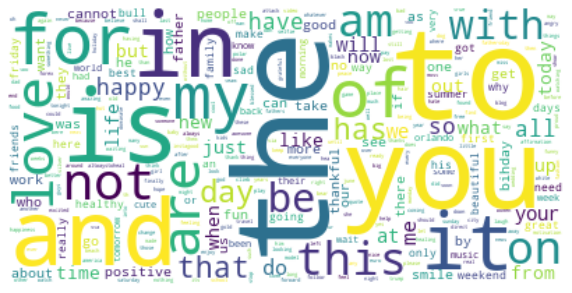

In [17]:
words = []
for line in train_df['clean_tweet']: 
    line_words = line.split()
    words.extend(line_words)

wordfreq = collections.Counter(words)
wordcloud = WordCloud(
    background_color='white',
     max_words=2000,
     stopwords=set(stopwords.words('english'))
     ).generate_from_frequencies(wordfreq)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Задание 5.   
Теперь отобразим облако слов для отзывов, не содержащих токсичных комментариев (combine_df['label'] == 0). 

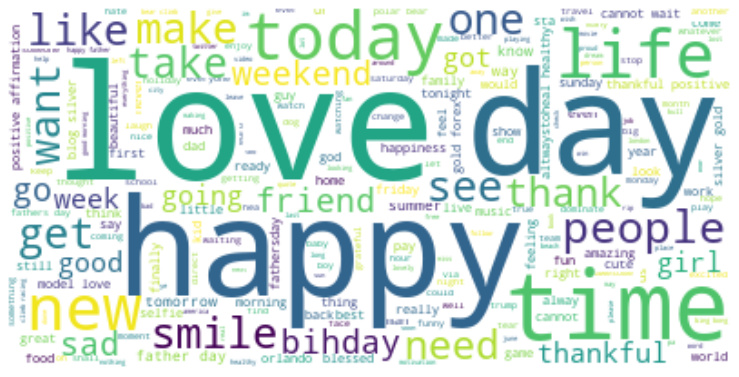

In [18]:
words = []
for line in train_df.loc[train_df['label'] == 0, 'clean_tweet']: 
    line_words = line.split()
    words.extend(line_words)
words = ' '.join(words)

stopwords_set = set(stopwords.words('english'))
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
    background_color='white',
    max_words=50000,
    stopwords = stopwords_set
   ).generate(words)
plt.figure(figsize=(13,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Задание 6.  
Теперь отобразим облако слов для отзывов, содержащих токсичные комментарии (combine_df['label'] == 1). 

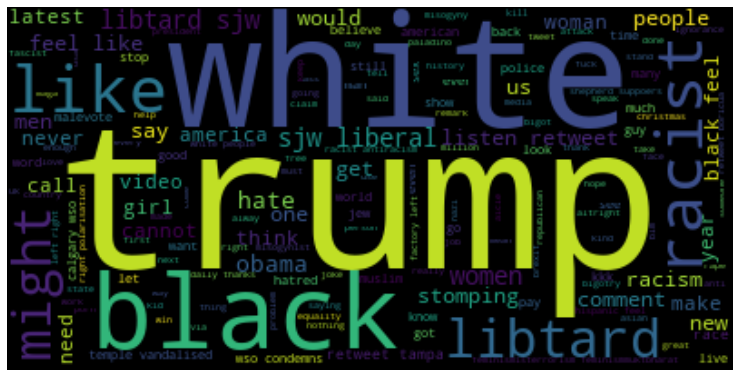

In [19]:
negative = [r for r in train_df['clean_tweet'][train_df['label']==1]]
neg = ''.join(negative)

stopwords_set = set(stopwords.words('english'))
wordcloud = WordCloud(
    background_color='black',
    max_words=50000,
    stopwords = stopwords_set
   ).generate(neg)
plt.figure(figsize=(13,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()